In [12]:
# data 
!wget -nc "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O temp/data/20241225-eComm-Dataset.csv

File ‘temp/data/20241225-eComm-Dataset.csv’ already there; not retrieving.


In [23]:
import pandas as pd
df = pd.read_csv("temp/data/20241225-eComm-Dataset.csv", index_col='ID')
df.drop(['profile_information', 'days_since_registration'], inplace=True, axis=1)
df.head()

,n_clicks,n_visits,amount_spent,amount_discount
ID,,,,
1476,130,65,213.905831,31.600751
1535,543,46,639.223004,5.689175
1807,520,102,1157.402763,844.321606
1727,702,83,1195.903634,850.041757
1324,221,84,180.754616,64.283300


<Axes: >

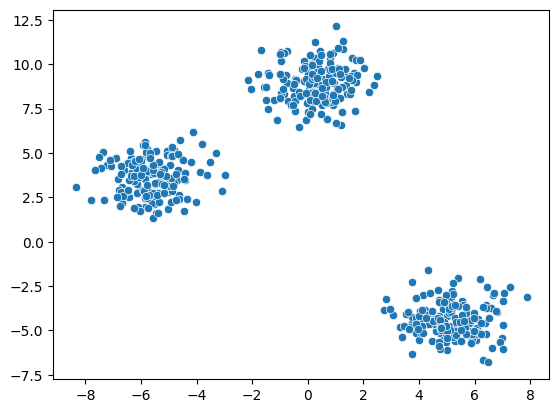

In [25]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

import seaborn as sns 
sns.scatterplot(x=X[:, 0], y=X[:, 1])

In [26]:
"""
X = [p1, p2, p3, p4 ... pn]
c = [
    [c1], 
    [c2], 
    [c3]
]

X - c = [p1, p2, p3, p4 ... pn] - c = [[p1, p2, p3, p4 ... pn]] - c 
  = [
        [p1, p2, p3, p4 ... pn],
        [p1, p2, p3, p4 ... pn],
        [p1, p2, p3, p4 ... pn]
    ]

  - [
        [c1, c1, ..... c1],
        [c2, c2, ..... c2],
        [c3, c3, ..... c3] 
    ]
  
  = [
        [p1 - c1, p2 - c1, .... pn - c1],
        [p1 - c2, p2 - c2, .... pn - c2],
        [p1 - c3, p2 - c3, .... pn - c3]
    ]
"""

None

<Axes: >

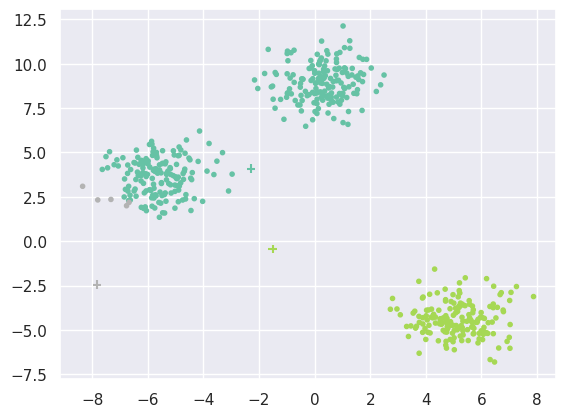

In [110]:
# k Means
# 1. assign random centroids
# 2. assign labels
# 3. calculate actual centroids and reassign 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
sns.set_theme()

class kMeans:
    def __init__(self, k:int, X: np.ndarray):
        """
        X shape --> (n_datapoints, n_features)
        X = [p1, p2, p3, p4 ... pn]
        """
        self.k = k  
        self.X = X
        self.assign_random_centroids()
        pass

    def assign_random_centroids(self):
        self.centroids = self.X.min(axis=0) + np.multiply(np.random.rand(self.k, self.X.shape[-1]), self.X.max(axis=0))
        self.centroids = self.centroids[:, np.newaxis]
    
    def assign_labels(self):
        d = (self.X - self.centroids)
        yd = np.apply_along_axis(np.linalg.norm, 2, d)
        self.y = np.argmin(yd, 0)

    def calc_centroid(self):
        self.centroids = np.array([[np.mean(X[self.y==l], axis=0)] for l in range(self.k)])
        pass

    def plot(self):
        f, ax = plt.subplots()
        c_xy = self.centroids.reshape(self.k, -1)
        
        ax.scatter(x=self.X[:, 0], y=self.X[:,1], c=self.y, marker='.', cmap='Set2')
        ax.scatter(x=c_xy[:, 0], y=c_xy[:, 1], c=range(self.k), marker='+', cmap='Set2')
        return ax 
    
model = kMeans(k = 3, X = X)
model.assign_random_centroids()
model.assign_labels()
model.plot()

<Axes: >

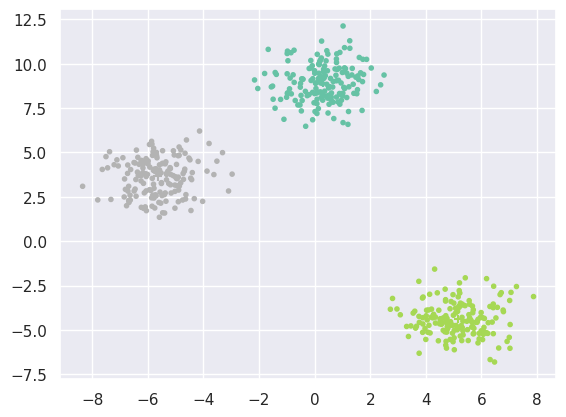

In [111]:
for _ in range(10):
    model.calc_centroid()
    model.assign_labels()

model.plot()